In [1]:
pip install torch torchtext pandas numpy scikit-learn tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
!pip uninstall torch torchtext -y
!pip install torch==2.2.0 torchtext==0.17.0

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchtext 0.18.0
Uninstalling torchtext-0.18.0:
  Successfully uninstalled torchtext-0.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Dataset & Preprocessing

In [18]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torchtext.vocab import GloVe
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torch.nn.utils.rnn import pad_sequence
from tqdm import tqdm
import re

# Load dataset
df = pd.read_csv("/content/IMDB Dataset.csv")
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Basic preprocessing
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-zA-Z ]', '', text)
    return text.lower()

df['review'] = df['review'].apply(clean_text)

# Tokenization
def tokenize(text):
    text = text.lower()
    return re.findall(r'\b\w+\b', text)

df['tokens'] = df['review'].apply(tokenize)
all_tokens = [token for sublist in df['tokens'] for token in sublist]
vocab = {'<PAD>': 0, '<UNK>': 1}
vocab.update({word: i+2 for i, (word, _) in enumerate(Counter(all_tokens).most_common(20000))})

def encode(tokens):
    return [vocab.get(token, 1) for token in tokens]

df['encoded'] = df['tokens'].apply(encode)


In [20]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-07-28 07:57:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-28 07:57:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-28 07:57:58--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [21]:
def load_glove(file_path, vocab, dim=100):
    embedding = np.zeros((len(vocab), dim))
    found = 0
    with open(file_path, encoding='utf8') as f:
        for line in f:
            parts = line.split()
            word, vec = parts[0], list(map(float, parts[1:]))
            if word in vocab:
                embedding[vocab[word]] = vec
                found += 1
    print(f"{found}/{len(vocab)} words found in GloVe.")
    return embedding

embedding_matrix = load_glove("glove.6B.100d.txt", vocab)


19288/20002 words found in GloVe.


In [22]:
class IMDBDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __getitem__(self, idx):
        return torch.tensor(self.texts[idx]), torch.tensor(self.labels[idx])

    def __len__(self):
        return len(self.labels)

def collate_fn(batch):
    texts, labels = zip(*batch)
    lengths = torch.tensor([len(t) for t in texts])
    padded = pad_sequence(texts, batch_first=True, padding_value=0)
    return padded, torch.tensor(labels), lengths


In [23]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, pretrained_emb=None, trainable=True):
        super().__init__()
        if pretrained_emb is not None:
            self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(pretrained_emb), freeze=not trainable)
        else:
            self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 2)

    def forward(self, x, lengths):
        x = self.embedding(x)
        packed = nn.utils.rnn.pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=False)
        _, hn = self.rnn(packed)
        return self.fc(hn.squeeze(0))

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, pretrained_emb=None, trainable=True):
        super().__init__()
        if pretrained_emb is not None:
            self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(pretrained_emb), freeze=not trainable)
        else:
            self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 2)

    def forward(self, x, lengths):
        x = self.embedding(x)
        packed = nn.utils.rnn.pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=False)
        _, (hn, _) = self.lstm(packed)
        return self.fc(hn.squeeze(0))


In [24]:
def train_model(model, train_loader, test_loader, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    history = {
        'train_loss': [],
        'val_acc': []
    }

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x, y, lengths in train_loader:
            x, y, lengths = x.to(device), y.to(device), lengths.to(device)
            optimizer.zero_grad()
            out = model(x, lengths)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        acc = evaluate(model, test_loader)
        history['train_loss'].append(total_loss / len(train_loader))
        history['val_acc'].append(acc)

        print(f"Epoch {epoch+1} | Train Loss: {total_loss:.4f} | Val Acc: {acc:.4f}")

    return history

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df['encoded'], df['sentiment'], test_size=0.2)

train_data = IMDBDataset(X_train.tolist(), y_train.tolist())
test_data = IMDBDataset(X_test.tolist(), y_test.tolist())

train_loader = DataLoader(train_data, batch_size=64, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=64, collate_fn=collate_fn)

# 1. RNN with GloVe
print("Training: RNN + GloVe")
model_rnn_glove = RNNClassifier(len(vocab), 100, 128, pretrained_emb=embedding_matrix, trainable=False)
train_model(model_rnn_glove, train_loader, test_loader)

# 2. LSTM with GloVe
print("\nTraining: LSTM + GloVe")
model_lstm_glove = LSTMClassifier(len(vocab), 100, 128, pretrained_emb=embedding_matrix, trainable=False)
train_model(model_lstm_glove, train_loader, test_loader)

# 3. RNN with learned embeddings
print("\nTraining: RNN + Learned Embedding")
model_rnn_learned = RNNClassifier(len(vocab), 100, 128)
train_model(model_rnn_learned, train_loader, test_loader)

# 4. LSTM with learned embeddings
print("\nTraining: LSTM + Learned Embedding")
model_lstm_learned = LSTMClassifier(len(vocab), 100, 128)
train_model(model_lstm_learned, train_loader, test_loader)


Training: RNN + GloVe
Epoch 1 | Train Loss: 412.6537 | Val Acc: 0.6502
Epoch 2 | Train Loss: 407.1661 | Val Acc: 0.5941
Epoch 3 | Train Loss: 414.0496 | Val Acc: 0.6444
Epoch 4 | Train Loss: 412.2384 | Val Acc: 0.5347
Epoch 5 | Train Loss: 422.4267 | Val Acc: 0.5956

Training: LSTM + GloVe
Epoch 1 | Train Loss: 387.7608 | Val Acc: 0.7705
Epoch 2 | Train Loss: 248.0207 | Val Acc: 0.8375
Epoch 3 | Train Loss: 202.7262 | Val Acc: 0.8552
Epoch 4 | Train Loss: 187.3060 | Val Acc: 0.8711
Epoch 5 | Train Loss: 174.1214 | Val Acc: 0.8722

Training: RNN + Learned Embedding
Epoch 1 | Train Loss: 415.7482 | Val Acc: 0.6399
Epoch 2 | Train Loss: 406.1058 | Val Acc: 0.5975
Epoch 3 | Train Loss: 400.6389 | Val Acc: 0.5855
Epoch 4 | Train Loss: 371.7147 | Val Acc: 0.6396
Epoch 5 | Train Loss: 361.3629 | Val Acc: 0.6408

Training: LSTM + Learned Embedding
Epoch 1 | Train Loss: 367.2762 | Val Acc: 0.7654
Epoch 2 | Train Loss: 280.5357 | Val Acc: 0.8466
Epoch 3 | Train Loss: 161.1100 | Val Acc: 0.8766
E

{'train_loss': [0.5876419606208801,
  0.4488571541547775,
  0.2577759653449059,
  0.1903626895904541,
  0.1417679980188608],
 'val_acc': [0.7654, 0.8466, 0.8766, 0.8875, 0.8866]}

In [29]:
# 1. RNN with GloVe
print("Training: RNN + GloVe")
model_rnn_glove = RNNClassifier(len(vocab), 100, 128, pretrained_emb=embedding_matrix, trainable=False)
history_rnn_glove = train_model(model_rnn_glove, train_loader, test_loader)

# 2. LSTM with GloVe
print("\nTraining: LSTM + GloVe")
model_lstm_glove = LSTMClassifier(len(vocab), 100, 128, pretrained_emb=embedding_matrix, trainable=False)
history_lstm_glove = train_model(model_lstm_glove, train_loader, test_loader)

# 3. RNN with learned embeddings
print("\nTraining: RNN + Learned Embedding")
model_rnn_learned = RNNClassifier(len(vocab), 100, 128)
history_rnn_learned = train_model(model_rnn_learned, train_loader, test_loader)

# 4. LSTM with learned embeddings
print("\nTraining: LSTM + Learned Embedding")
model_lstm_learned = LSTMClassifier(len(vocab), 100, 128)
history_lstm_learned = train_model(model_lstm_learned, train_loader, test_loader)


Training: RNN + GloVe
Epoch 1 | Train Loss: 416.8919 | Val Acc: 0.5366
Epoch 2 | Train Loss: 391.9713 | Val Acc: 0.6875
Epoch 3 | Train Loss: 402.2017 | Val Acc: 0.6806
Epoch 4 | Train Loss: 414.0615 | Val Acc: 0.5701
Epoch 5 | Train Loss: 414.1885 | Val Acc: 0.6551

Training: LSTM + GloVe
Epoch 1 | Train Loss: 398.2168 | Val Acc: 0.5805
Epoch 2 | Train Loss: 320.6938 | Val Acc: 0.8067
Epoch 3 | Train Loss: 218.9407 | Val Acc: 0.8517
Epoch 4 | Train Loss: 195.8407 | Val Acc: 0.8653
Epoch 5 | Train Loss: 181.9171 | Val Acc: 0.8716

Training: RNN + Learned Embedding
Epoch 1 | Train Loss: 419.2672 | Val Acc: 0.6309
Epoch 2 | Train Loss: 368.3670 | Val Acc: 0.7051
Epoch 3 | Train Loss: 378.7520 | Val Acc: 0.6633
Epoch 4 | Train Loss: 369.8343 | Val Acc: 0.7410
Epoch 5 | Train Loss: 359.5030 | Val Acc: 0.6540

Training: LSTM + Learned Embedding
Epoch 1 | Train Loss: 359.0753 | Val Acc: 0.7933
Epoch 2 | Train Loss: 290.5126 | Val Acc: 0.8216
Epoch 3 | Train Loss: 224.9104 | Val Acc: 0.8478
E

/tmp/ipython-input-30-910139239.py:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


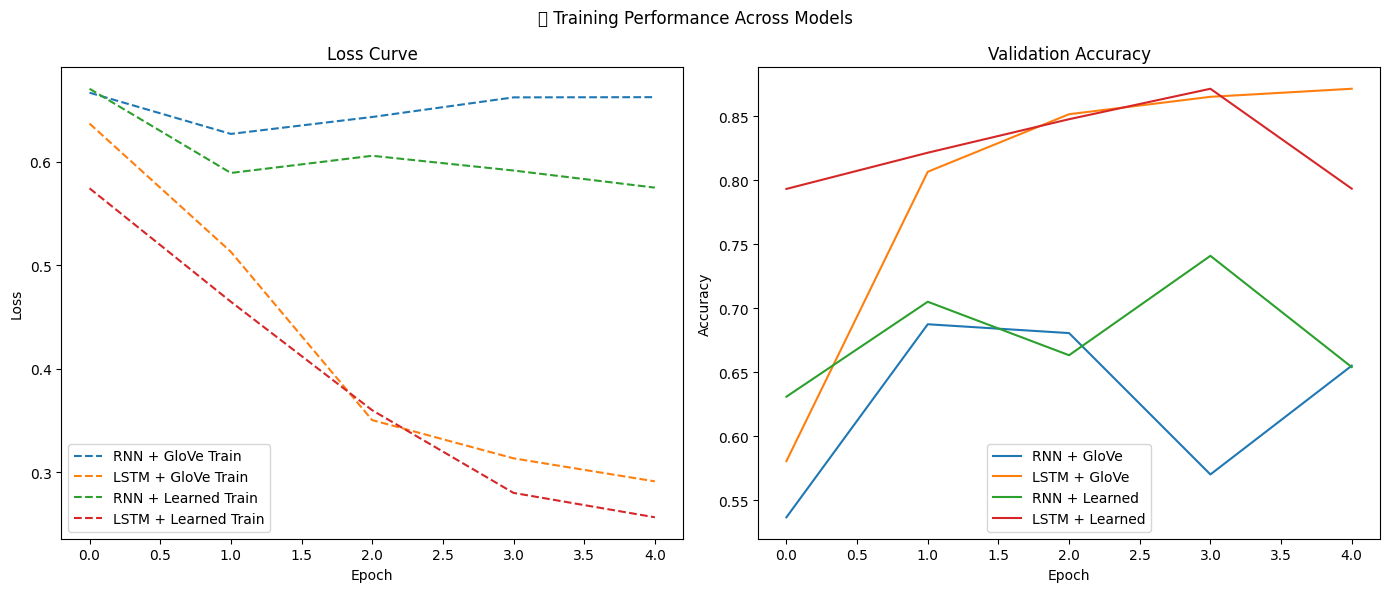

In [30]:
import matplotlib.pyplot as plt

def plot_all_training_histories(histories, labels, title="Model Comparison"):
    plt.figure(figsize=(14, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    for hist, label in zip(histories, labels):
        plt.plot(hist['train_loss'], label=f"{label} Train", linestyle='--')
        if 'val_loss' in hist:
            plt.plot(hist['val_loss'], label=f"{label} Val")
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    for hist, label in zip(histories, labels):
        if 'val_acc' in hist:
            plt.plot(hist['val_acc'], label=f"{label}")
    plt.title("Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# 👇 Call it with your saved histories
plot_all_training_histories(
    histories=[
        history_rnn_glove,
        history_lstm_glove,
        history_rnn_learned,
        history_lstm_learned
    ],
    labels=[
        "RNN + GloVe",
        "LSTM + GloVe",
        "RNN + Learned",
        "LSTM + Learned"
    ],
    title="📈 Training Performance Across Models"
)


In [26]:
def evaluate(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y, lengths in test_loader:
            x, y, lengths = x.to(device), y.to(device), lengths.to(device)
            out = model(x, lengths)
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    return correct / total